In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import klib as k
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, \
GradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from sklearn.svm import LinearSVR
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('./Concrete_Data.csv')
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
flyash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseaggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineaggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
csMPa,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [6]:
df.isnull().mean()*100

cement              0.0
slag                0.0
flyash              0.0
water               0.0
superplasticizer    0.0
coarseaggregate     0.0
fineaggregate       0.0
age                 0.0
csMPa               0.0
dtype: float64

In [7]:
df.duplicated().sum()

25

### Univariate Analysis:

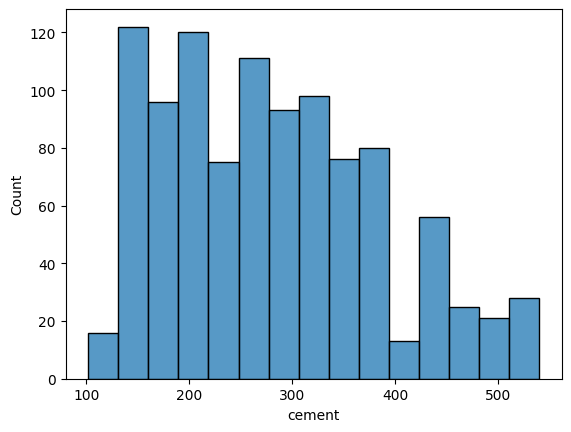

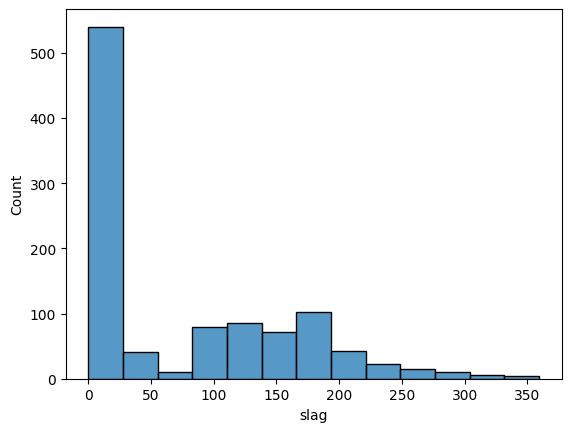

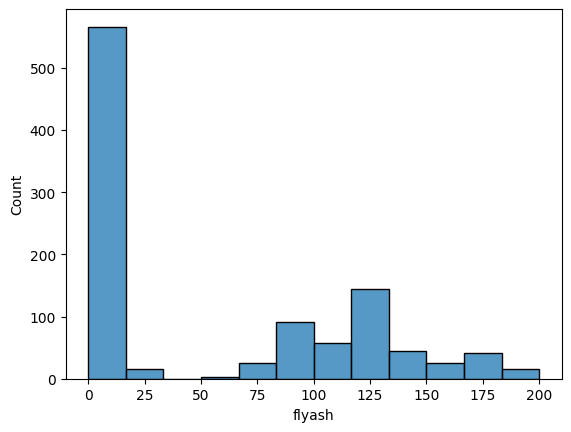

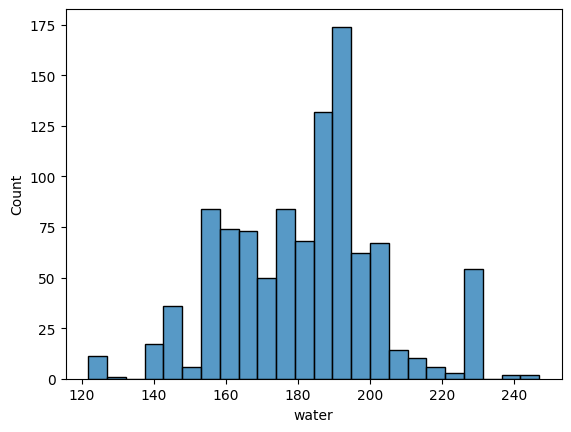

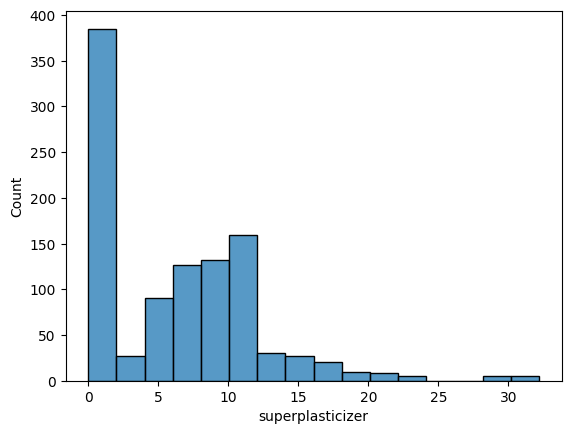

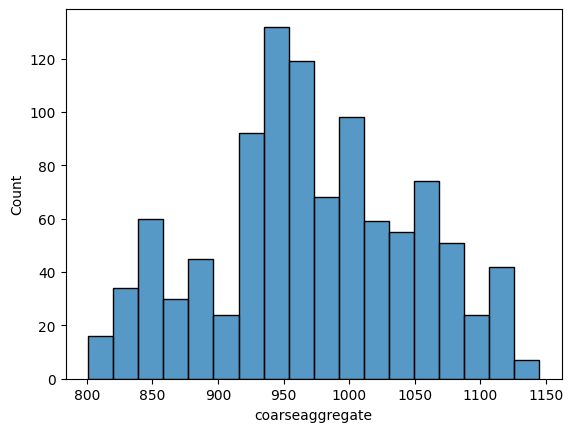

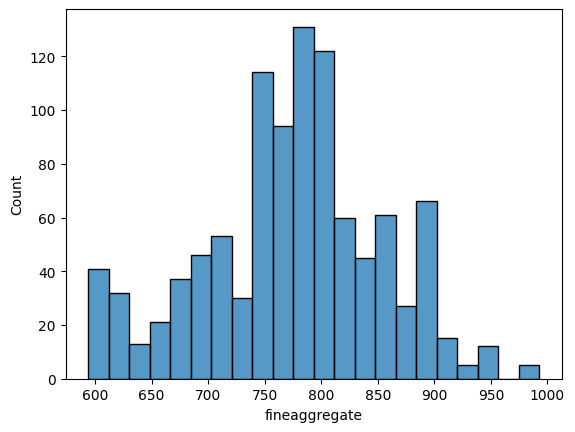

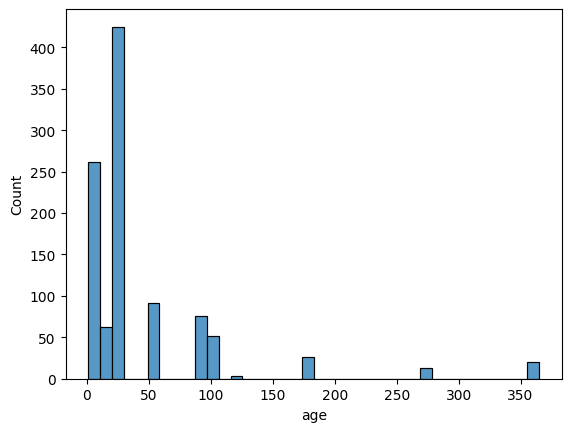

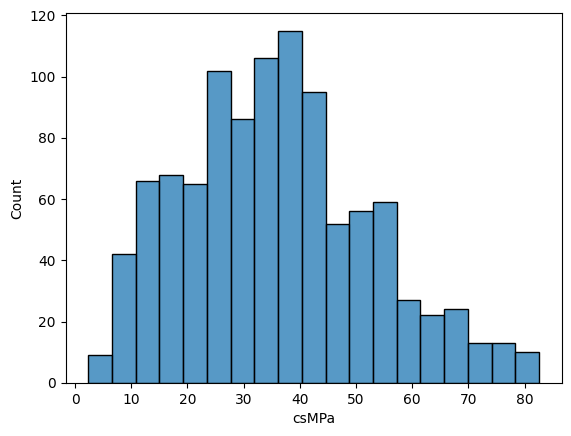

In [8]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.histplot(x=df[i])
        plt.show()

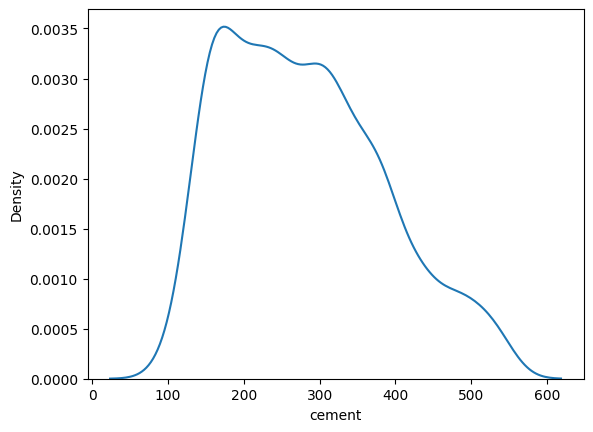

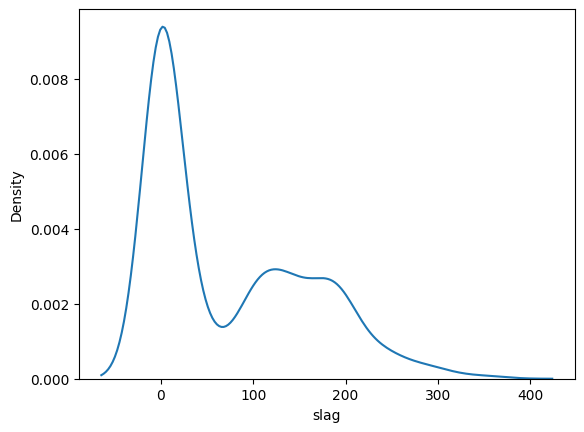

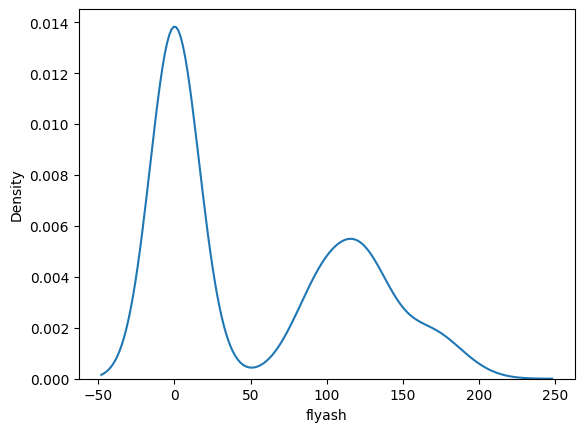

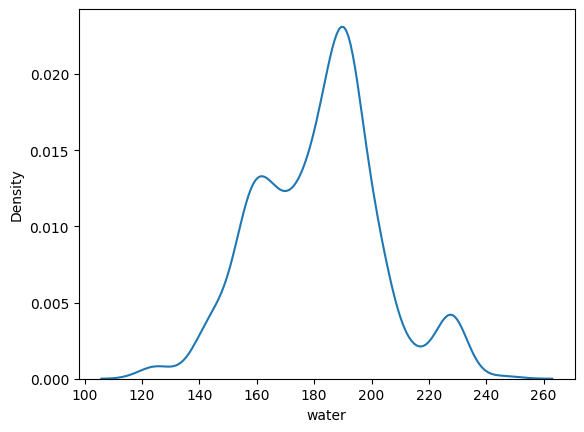

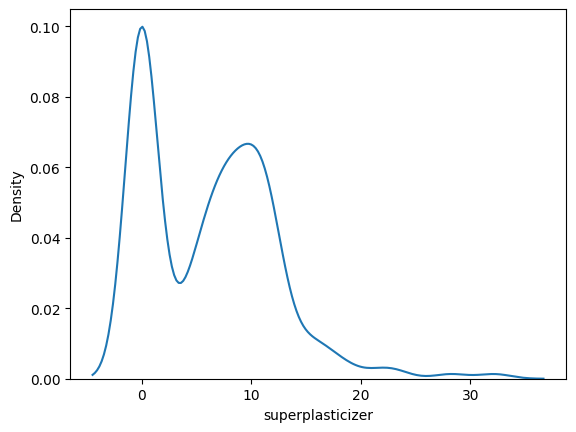

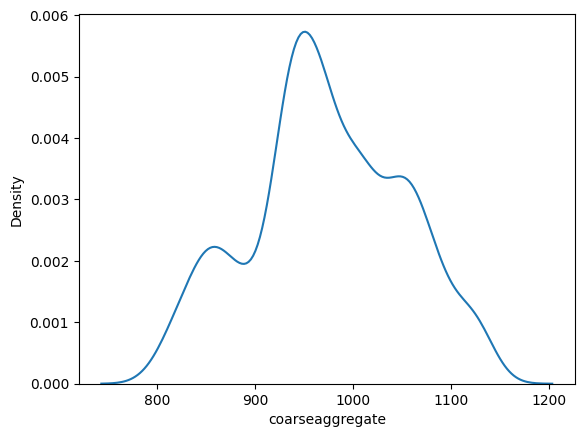

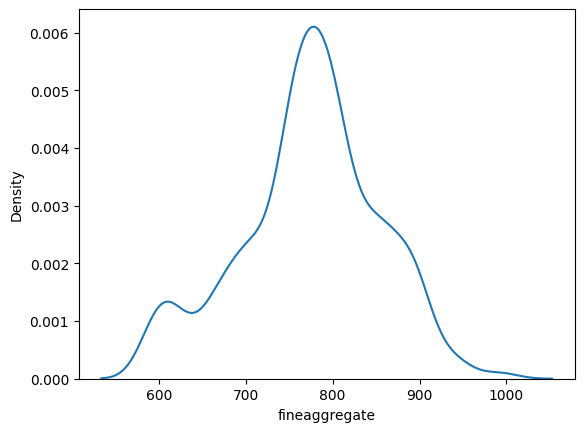

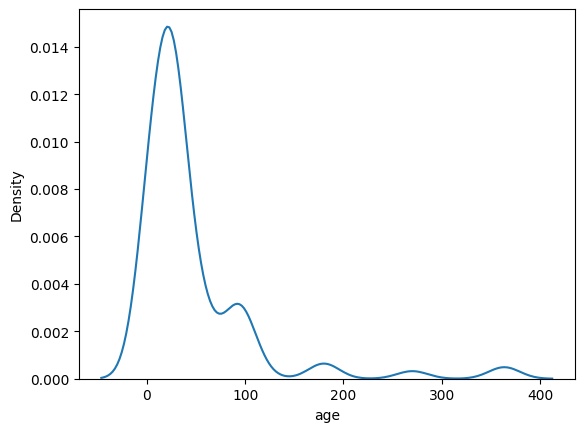

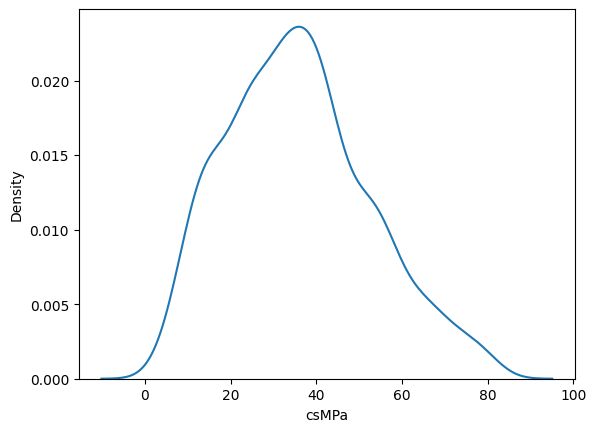

In [9]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.kdeplot(x=df[i])
        plt.show()

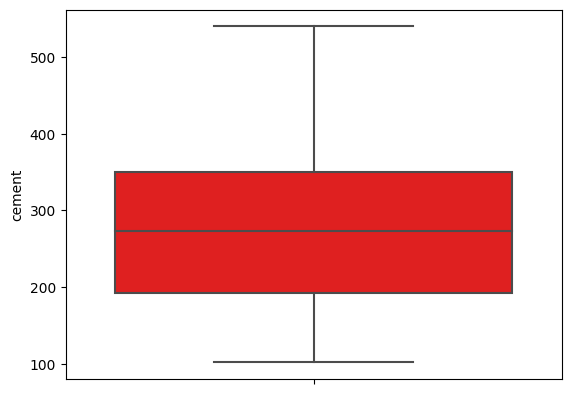

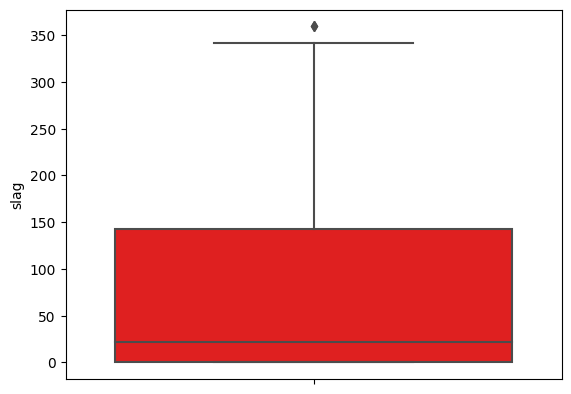

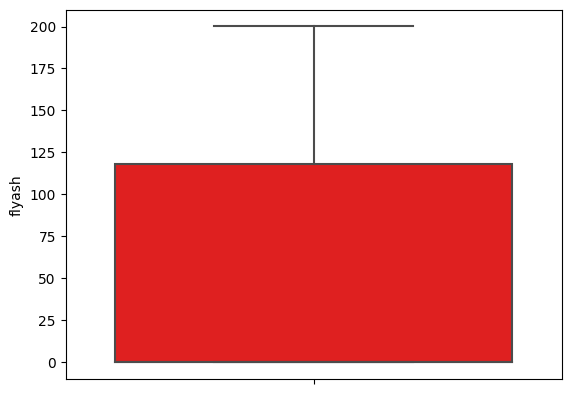

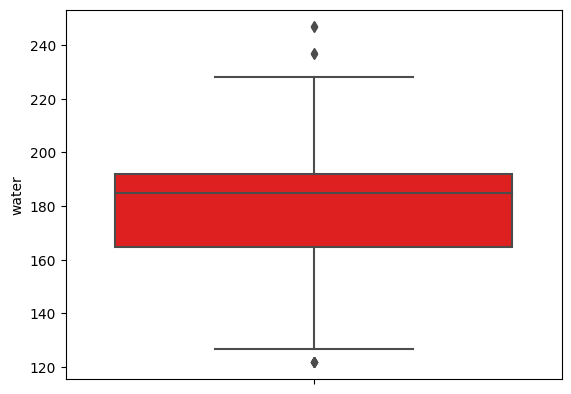

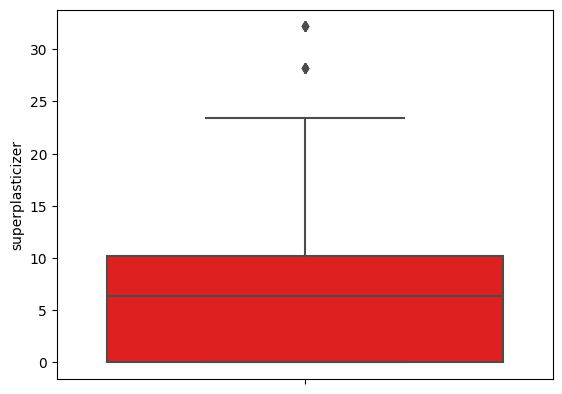

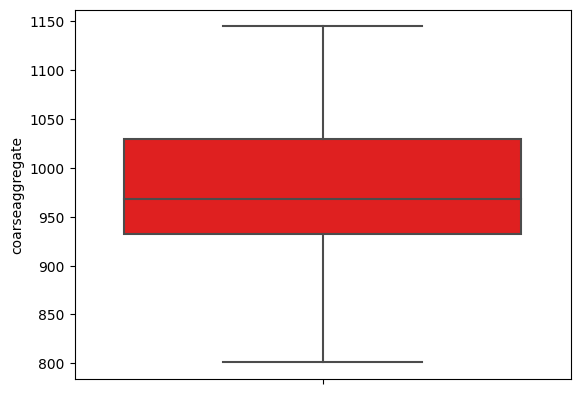

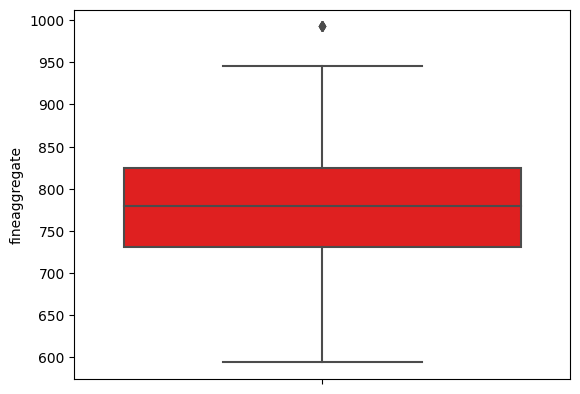

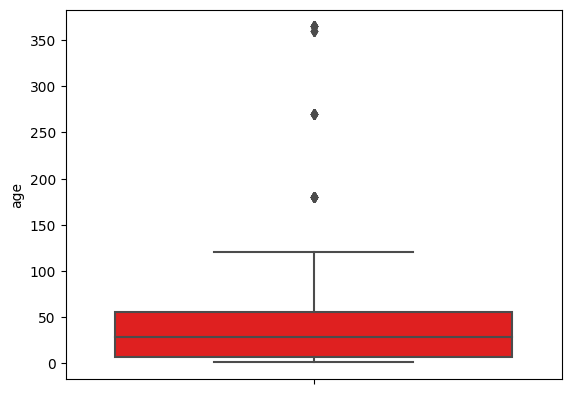

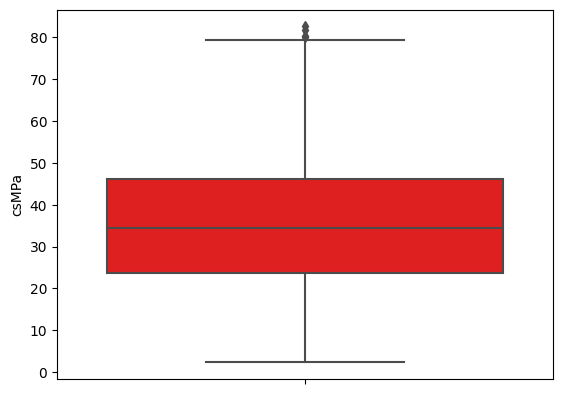

In [10]:
for i in df.columns:
    if df[i].dtype!="object":
        sns.boxplot(y=df[i],color='red')
        plt.show()

In [11]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [12]:
for i in df.columns:
    if df[i].dtype !="object":
        UL,LL = outlier_limit(df[i])
        df[i] = np.where((df[i]>UL)|(df[i]<LL), np.nan, df[i])

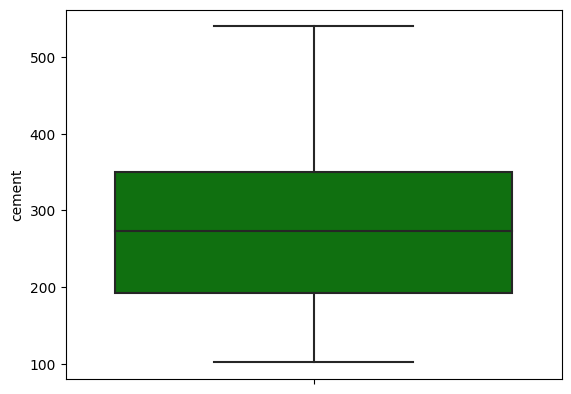

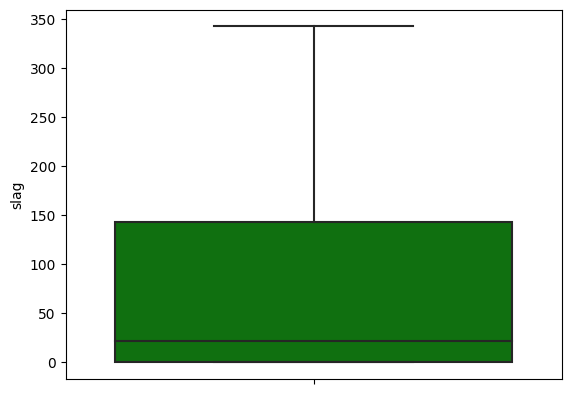

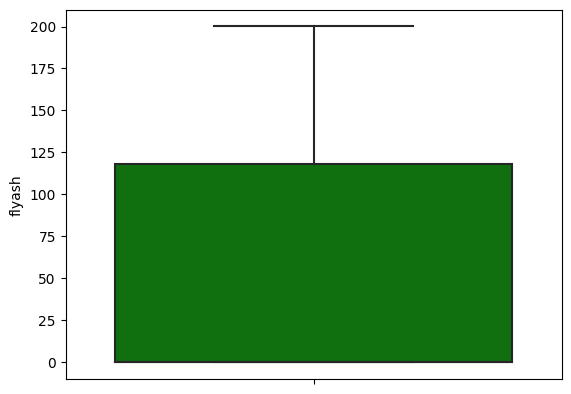

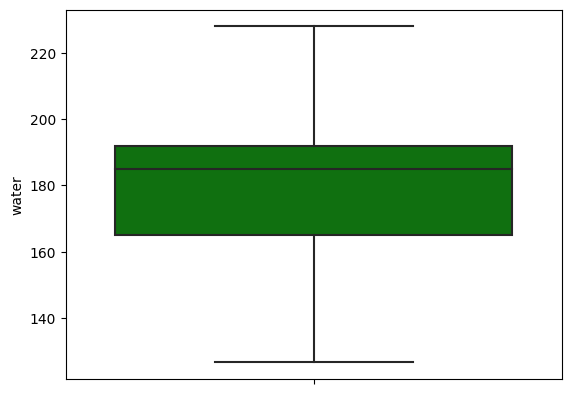

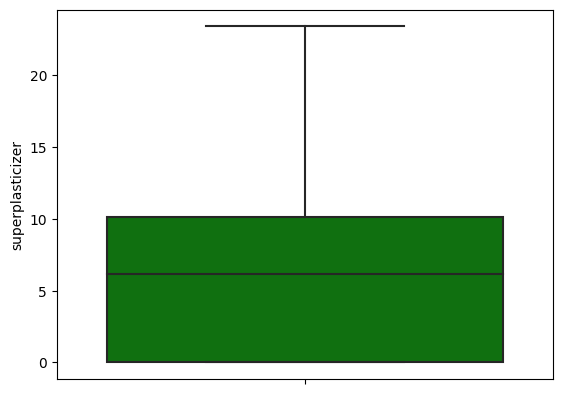

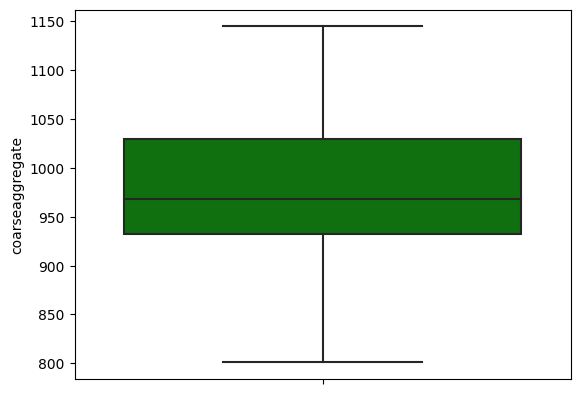

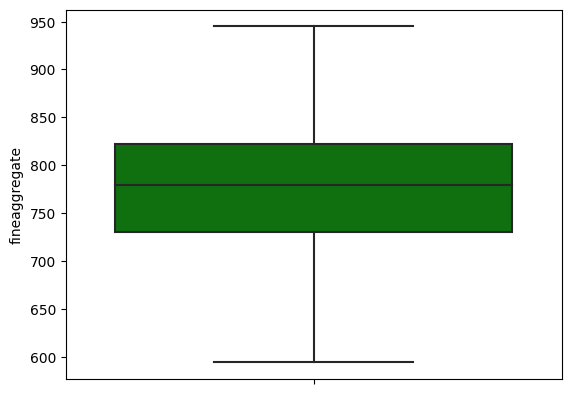

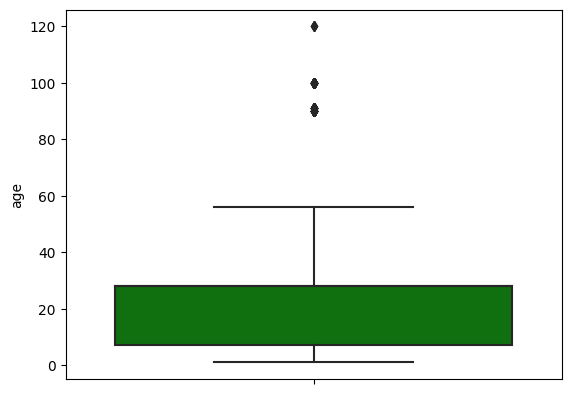

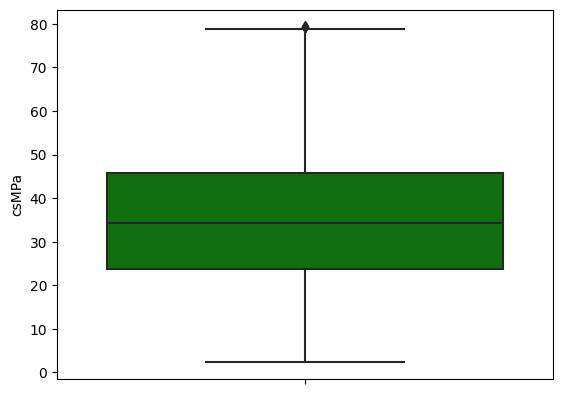

In [13]:
for i in df.columns:
    if df[i].dtype != "object":
        sns.boxplot(y=df[i],color='green')
        plt.show();

In [14]:
df.dropna(inplace=True)
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90.0,47.03
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28.0,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28.0,39.29
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0,32.77


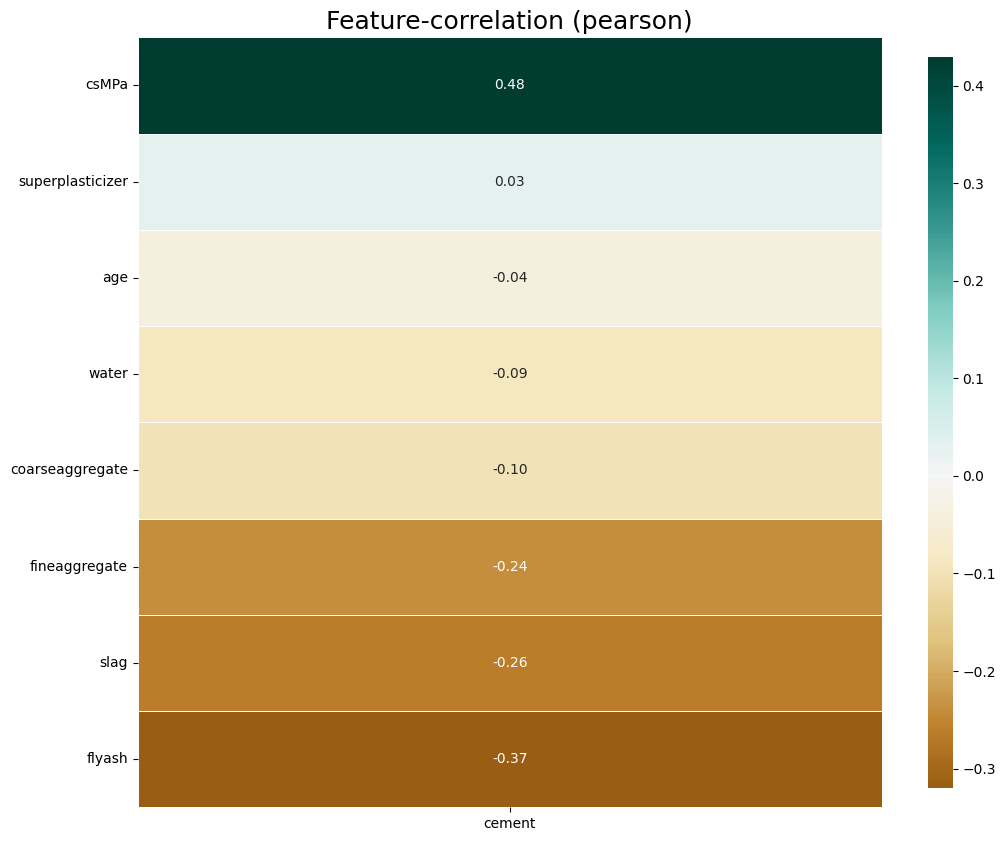

In [15]:
k.corr_plot(data=df, target='cement');

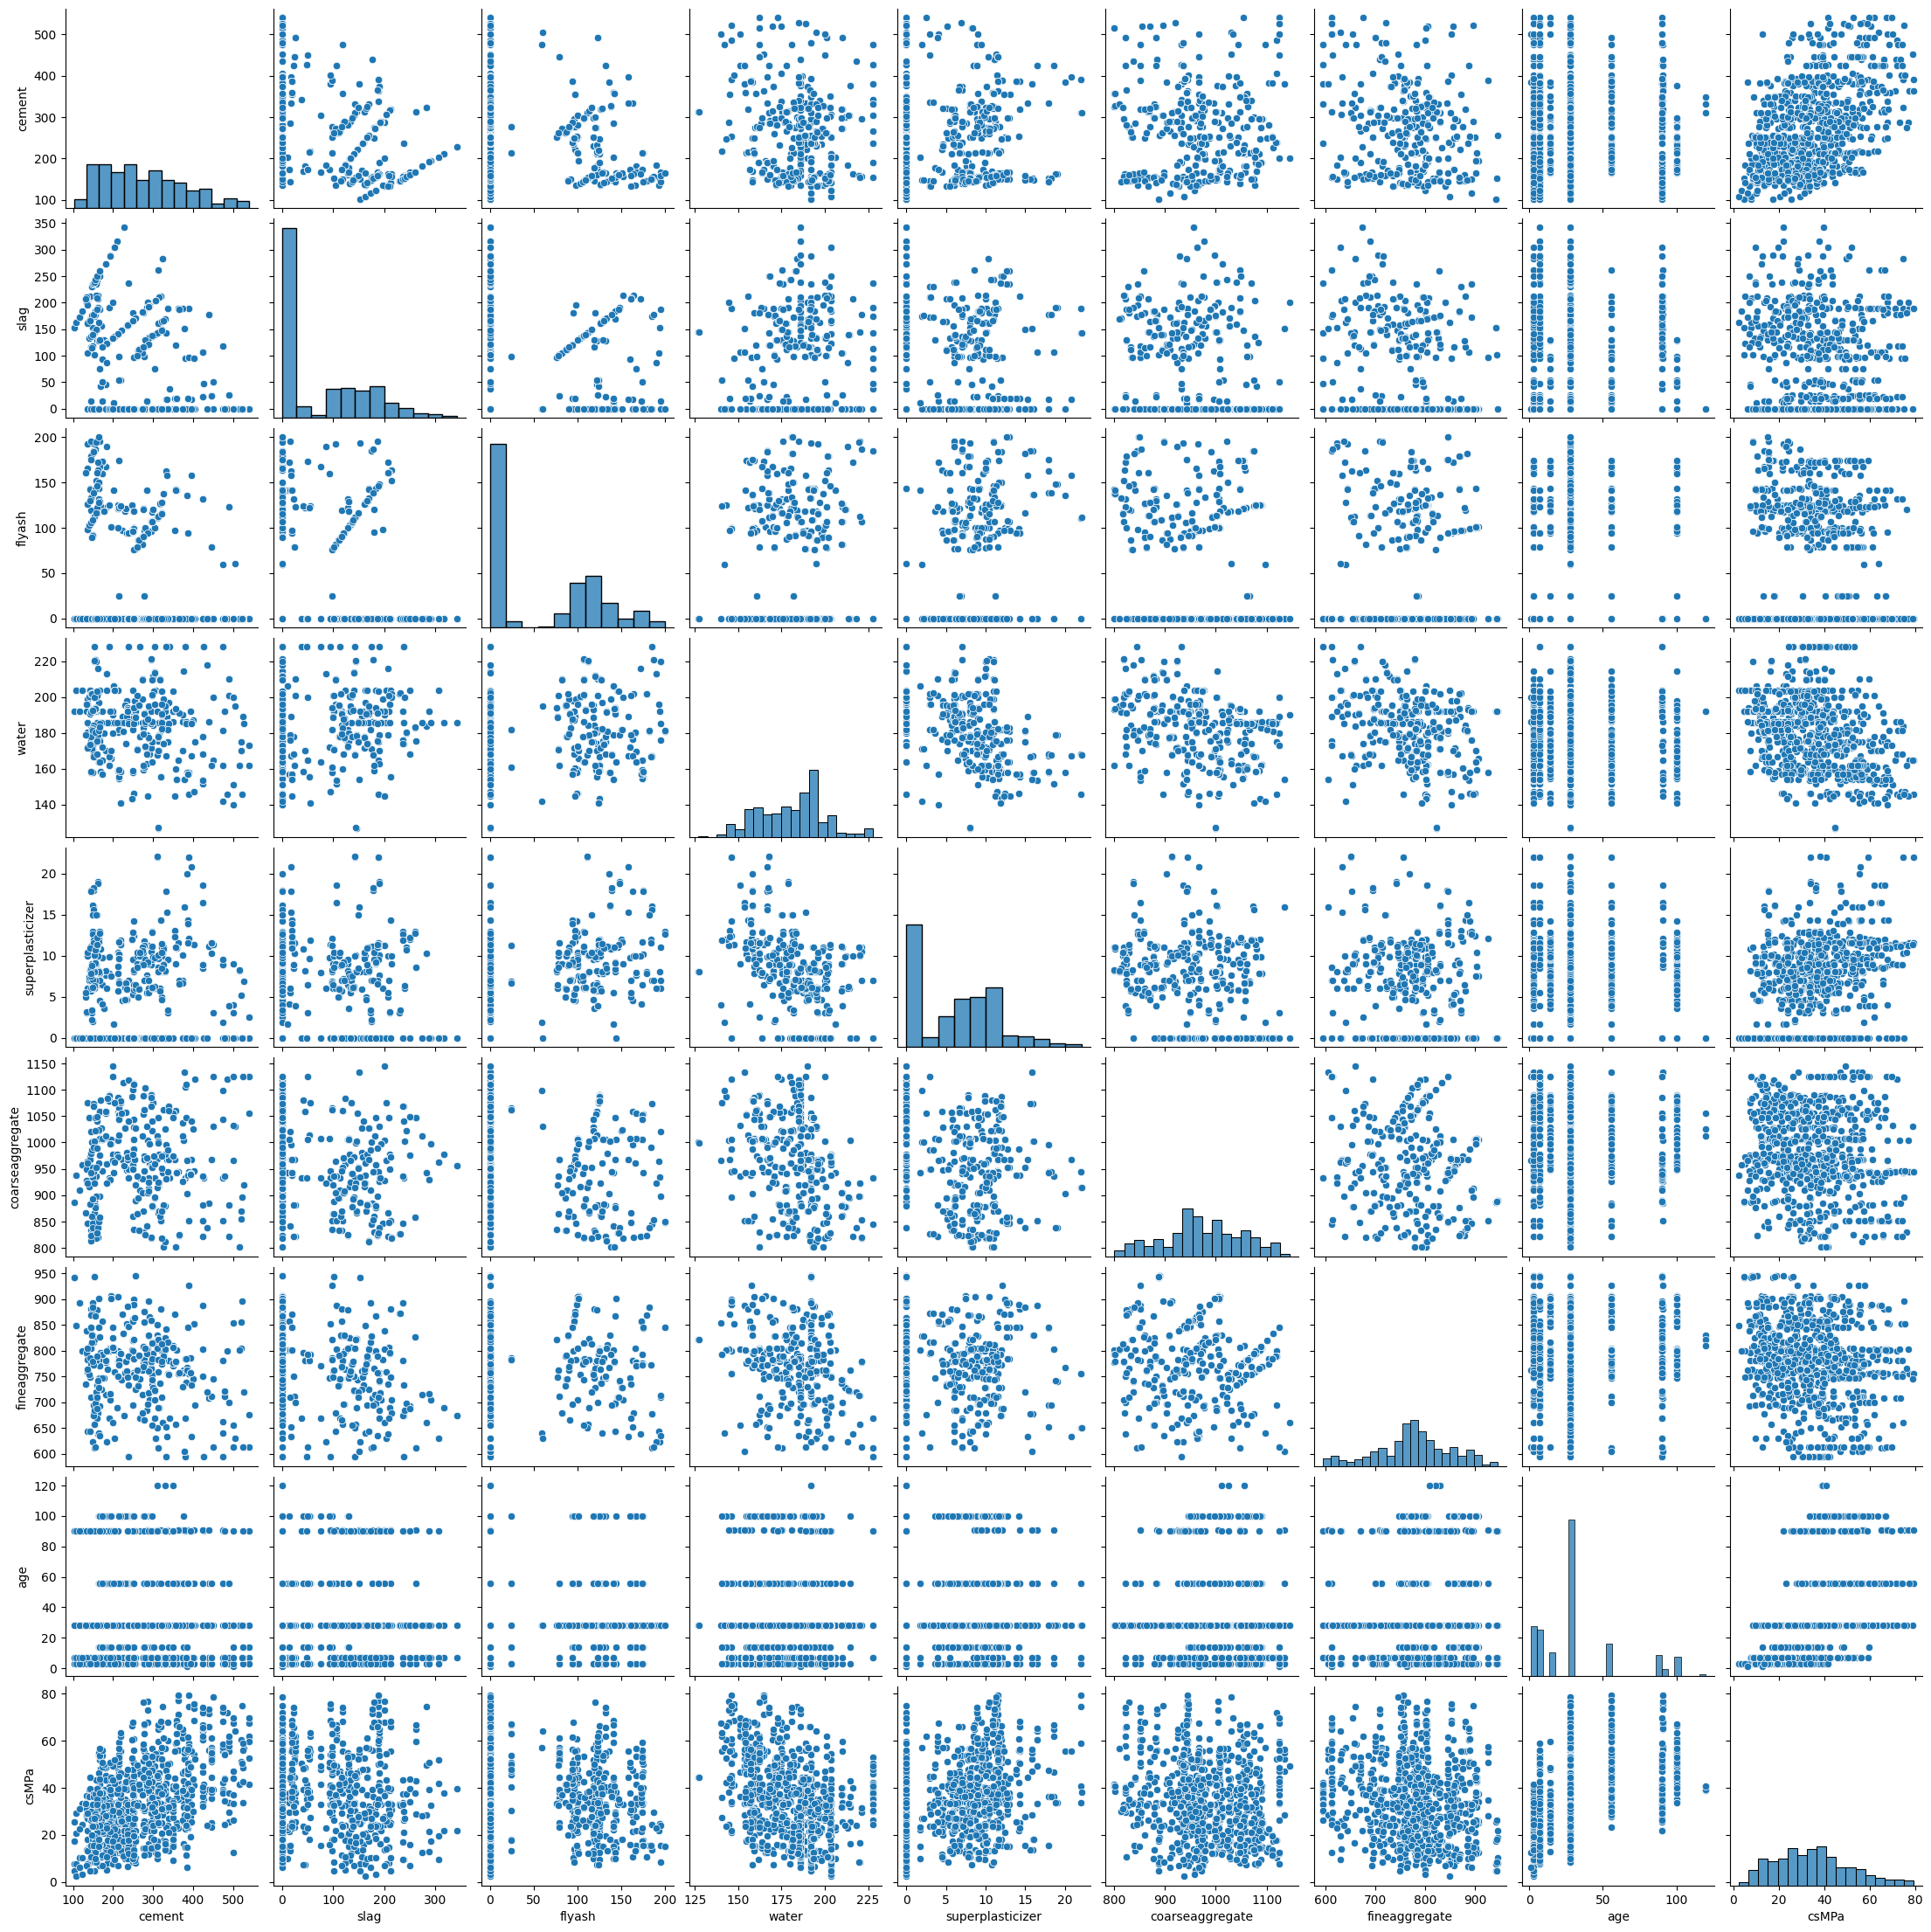

In [23]:
sns.pairplot( df )

Text(0.5, 0, 'cement')

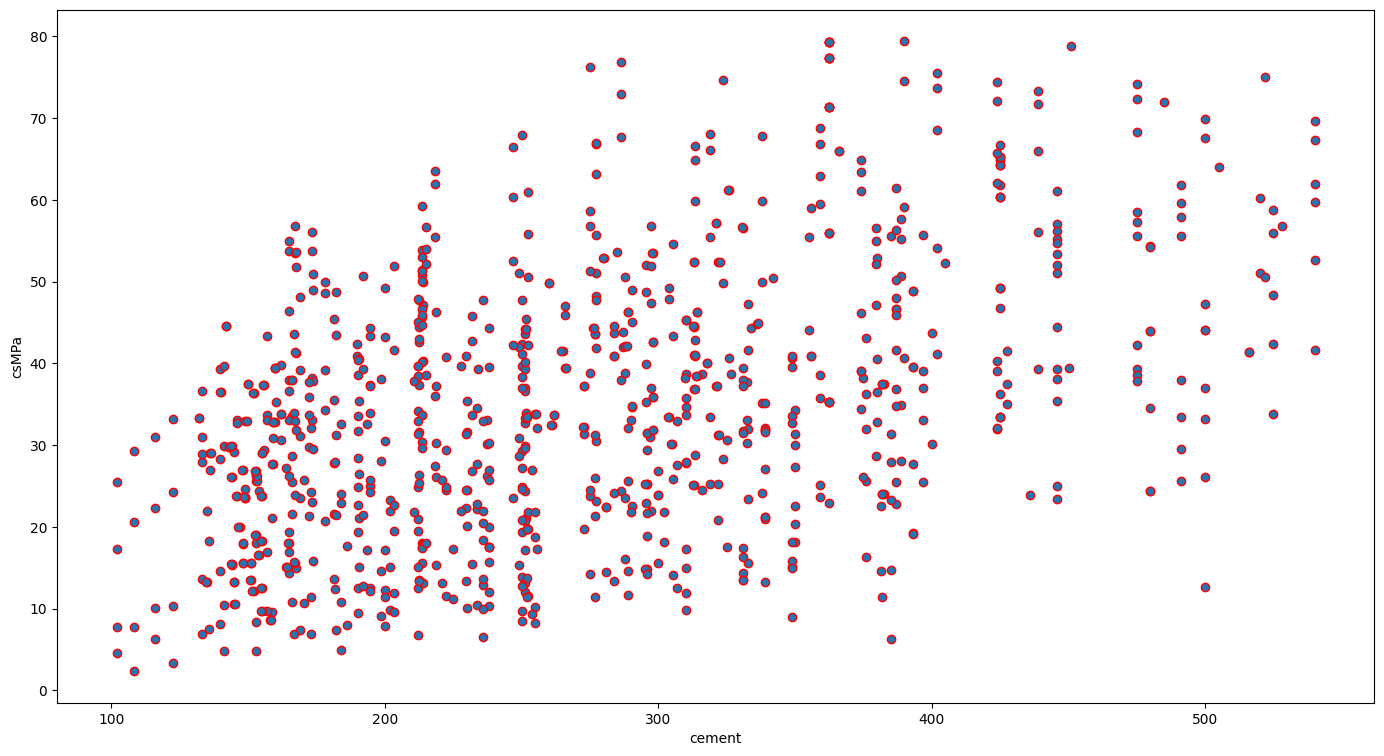

In [21]:
plt.figure(figsize=[17,9])
plt.scatter(y='csMPa',x='cement',edgecolors='red',data=df)
plt.ylabel('csMPa')
plt.xlabel('cement')

Text(0.5, 0, 'flyash')

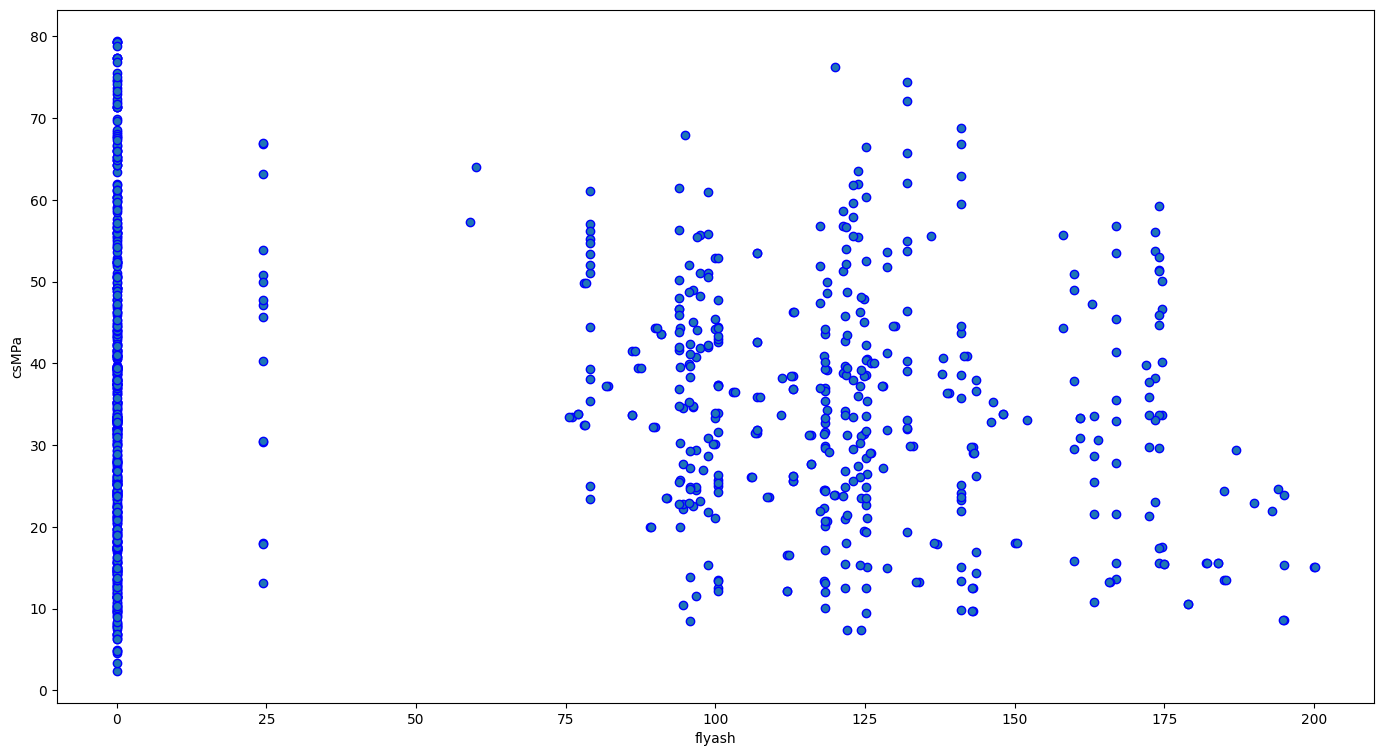

In [24]:
plt.figure(figsize=[17,9])
plt.scatter(y='csMPa',x='flyash',edgecolors='blue',data=df)
plt.ylabel('csMPa')
plt.xlabel('flyash')

<AxesSubplot: >

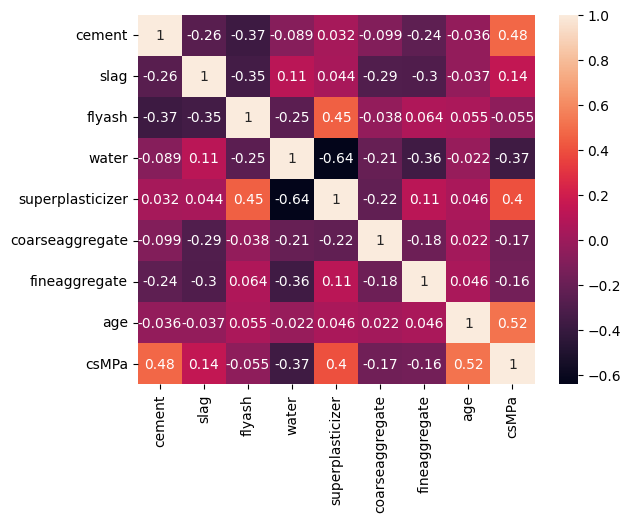

In [25]:
sns.heatmap(df.corr(),annot=True)


In [26]:
# independent variables
x = df.drop(['csMPa'],axis=1)
# dependent variables
y = df['csMPa']

In [27]:
sc= StandardScaler()
x = sc.fit_transform(x)


In [35]:
# importing train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

In [36]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(random_state=0),
}

In [37]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print("model trained with {}".format(name))
    training_score = model.score(x_train, y_train)*100
    testing_score = model.score(x_test, y_test)*100
    score = r2_score(y_test, model.predict(x_test))*100
    mae = mean_absolute_error(y_test, model.predict(x_test))
    mse = mean_squared_error(y_test, model.predict(x_test))
    rmse = np.sqrt(mse)
    print("r2score: ",score)
    print("training_score: ", training_score)
    print("testing_score: ", testing_score)
    print("mae: ", mae)
    print("mse: ", mse)
    print("rmse_test: ", rmse)
    print("*"*100)

model trained with LinearRegression
r2score:  75.50275284843799
training_score:  77.45552036054404
testing_score:  75.50275284843799
mae:  6.258136724556564
mse:  65.81169663183869
rmse_test:  8.11244085536768
****************************************************************************************************
model trained with Ridge
r2score:  75.48661286230887
training_score:  77.45434950671705
testing_score:  75.48661286230887
mae:  6.25997360271263
mse:  65.85505660058126
rmse_test:  8.115112851992958
****************************************************************************************************
model trained with LinearSVR
r2score:  74.86512588526992
training_score:  76.92460245359403
testing_score:  74.86512588526992
mae:  6.267781377656787
mse:  67.52467736002725
rmse_test:  8.217340041645304
****************************************************************************************************
model trained with DecisionTreeRegressor
r2score:  77.10138231535821
training_score:

In [40]:
SVR=LinearSVR()

In [41]:
SVR.fit(x_train,y_train)

LinearSVR()

In [42]:
y_pred=SVR.predict(x)

In [43]:
y_pred

array([55.50810527, 42.55838659, 34.49274585, 23.27175593, 37.97818455,
       41.13787926, 21.8512486 , 39.77003563, 24.66593141, 46.74091304,
       39.1310394 , 53.77937651, 19.84440873, 12.06754153, 36.2354652 ,
       31.4456161 , 29.26458779, 52.03665716, 57.26481522, 45.34673756,
       55.52209587, 29.70289675, 19.75018221, 22.73201934, 27.9601774 ,
       48.55121846, 43.95256208, 13.31184028, 15.31868014, 14.07438139,
       32.7500265 , 16.55911901, 26.21745804, 20.48340497, 49.3545912 ,
       43.84089092, 41.64116093, 47.92080193, 49.26938191, 47.28121542,
       47.92080193, 40.94421036, 47.92080193, 43.06456257, 44.08322491,
       44.03308684, 43.23912159, 46.97434528, 44.03308684, 39.87403944,
       44.03308684, 47.74071826, 53.74962901, 44.03308684, 38.89615073,
       45.08518968, 42.88545968, 49.16510068, 50.51368066, 48.52551417,
       49.16510068, 42.18850911, 49.16510068, 44.30886132, 45.32752366,
       45.27738559, 44.48342034, 48.21864403, 45.27738559, 41.11

In [44]:
PREDICTRION= pd.DataFrame(zip(y,y_pred),columns=('ACTUAL','PREDICTED'),dtype=float)

In [45]:
PREDICTRION

,ACTUAL,PREDICTED
0,61.89,55.508105
1,47.03,42.558387
2,36.45,34.492746
3,45.85,23.271756
4,39.29,37.978185
...,...,...
936,44.28,39.309092
937,31.18,34.450088
938,23.70,24.847356
939,32.77,28.678030


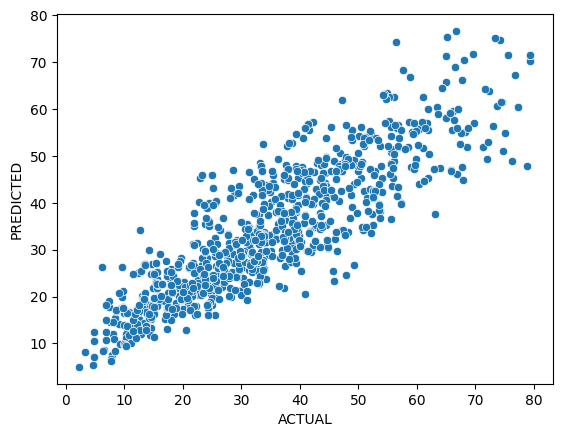

In [46]:
sns.scatterplot(data=PREDICTRION,x='ACTUAL',y='PREDICTED')
plt.show()

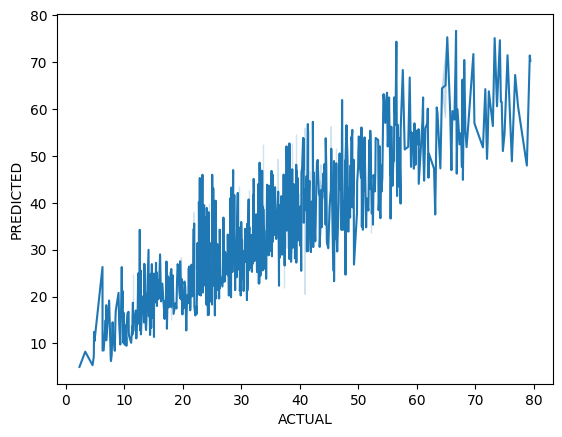

In [47]:
sns.lineplot(data=PREDICTRION,x='ACTUAL',y='PREDICTED')
plt.show()